In [ ]:
pip install google-cloud


In [ ]:
pip install pandas

In [ ]:
!pip install requests

In [ ]:
from google.cloud import bigquery
from google.cloud import storage
from google.oauth2 import service_account
import json
client = bigquery.Client()

In [ ]:
url = 'https://coronavirus.m.pipedream.net'

Esta parte del código realiza solicitudes HTTP para obtener datos sobre el coronavirus desde una URL pública, los carga en un DataFrame de Pandas, limpia los datos eliminando filas con valores nulos y filas duplicadas, y finalmente imprime el DataFrame resultante.

In [ ]:
import requests
import pandas as pd

url = "https://coronavirus.m.pipedream.net"

response = requests.get(url)

data = json.loads(response.content)
df = pd.DataFrame(data["rawData"])
# Remove rows with missing values
df = df.dropna()



# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Remove duplicate rows
df = df.drop_duplicates()


print(df)



<ipython-input-8-580056d87966>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chile['Confirmed'] = df_chile['Confirmed'].astype(float)


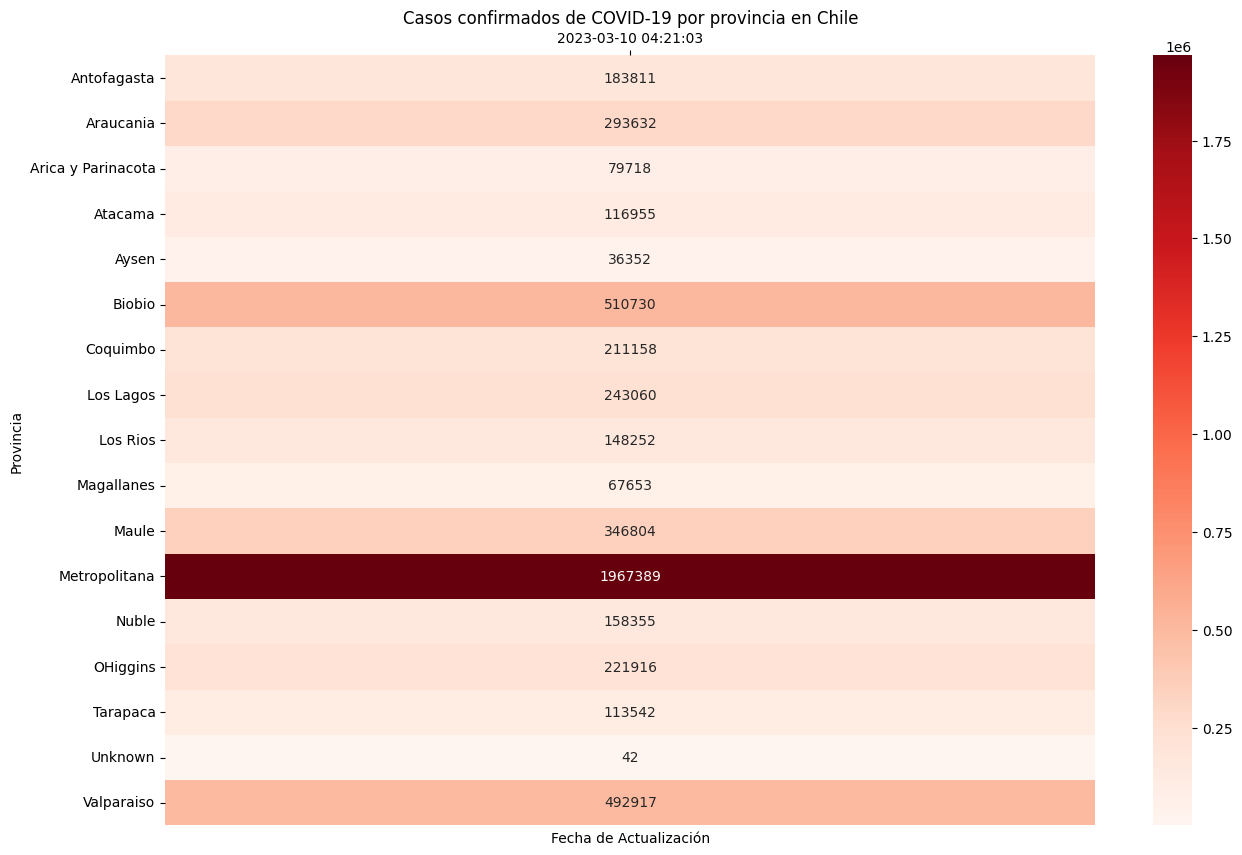

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener datos de casos confirmados por provincia en Chile
url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]
df = pd.DataFrame(data)

# Filtrar los datos para Chile
df_chile = df[df['Country_Region'] == 'Chile']
df_chile['Confirmed'] = df_chile['Confirmed'].astype(float)

# Pivotar los datos para el mapa de calor
pivot_table = df_chile.pivot_table(index='Province_State', columns='Last_Update', values='Confirmed')

# Creamos un mapa de calor usando seaborn
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(pivot_table, cmap='Reds', annot=True, fmt=".0f")
heatmap.set_title('Casos confirmados de COVID-19 por provincia en Chile')
heatmap.set_xlabel('Fecha de Actualización')
heatmap.set_ylabel('Provincia')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
heatmap.xaxis.set_ticks_position('top')  # Colocar los ticks del eje x en la parte superior
plt.show()


# Análisis de Datos Sobre Este gráfico

# Análisis de Datos
Del mapa de calor generado por el código proporcionado, podemos deducir varias cosas:

1. **Distribución geográfica de casos confirmados**: Podemos observar cómo se distribuyen los casos confirmados de COVID-19 en las distintas provincias de Chile. Las áreas con colores más oscuros indican un mayor número de casos confirmados, mientras que las áreas más claras indican menos casos.

2. **Variación temporal de casos por provincia**: Al observar el mapa de calor a lo largo del tiempo (a través de las fechas de actualización en el eje x), podemos notar cómo la situación de la pandemia ha evolucionado en cada provincia. Las áreas que van cambiando de color pueden indicar un aumento o disminución en el número de casos confirmados en esas provincias a lo largo del tiempo.

3. **Diferencias regionales en la incidencia de COVID-19**: El mapa de calor nos permite comparar la incidencia del virus entre diferentes provincias de Chile. Podemos identificar áreas con una mayor concentración de casos en comparación con otras, lo que puede sugerir disparidades en la propagación del virus y en la efectividad de las medidas de control en diferentes regiones.

4. **Patrones de propagación del virus**: El mapa de calor también puede ayudar a identificar patrones de propagación del virus a lo largo del tiempo y entre diferentes áreas geográficas. Por ejemplo, podemos observar si hay áreas donde los casos confirmados se concentran inicialmente y luego se propagan a otras áreas circundantes.

En resumen, el mapa de calor proporciona una representación visual útil de la distribución geográfica y temporal de los casos confirmados de COVID-19 en las provincias de Chile, lo que puede ayudar a los investigadores, autoridades de salud y al público en general a comprender mejor la situación de la pandemia en el país.

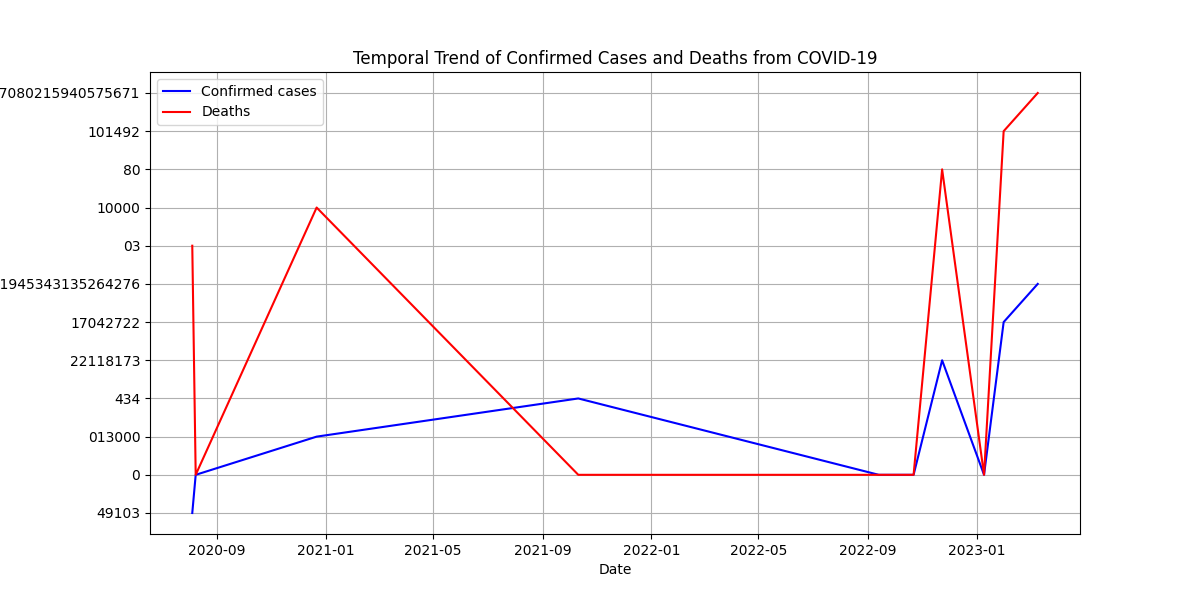

ValueError: Image size of 164233x547 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x600 with 1 Axes>

In [ ]:
from PIL import Image

url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]

df = pd.DataFrame(data)

df['Last_Update'] = pd.to_datetime(df['Last_Update'])

# Agrupamos los datos por fecha y hacemos una suma de contagios y de decesos
df_daily = df.groupby('Last_Update').agg({'Confirmed': 'sum', 'Deaths': 'sum'}).reset_index()

# Ploteamos las tendencias de contagios y decesos
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Last_Update'], df_daily['Confirmed'], label='Confirmed cases', color='blue')
plt.plot(df_daily['Last_Update'], df_daily['Deaths'], label='Deaths', color='red')
plt.title('Temporal Trend of Confirmed Cases and Deaths from COVID-19')
plt.xlabel('Date')
plt.ylabel('Number of Cases')

plt.legend()
plt.grid(True)
plt.savefig('figure.png')
Image.open('figure.png')
#plt.show()



# Análisis de Datos Sobre este Gráfico y código
Del gráfico generado por el código proporcionado, podemos deducir varias cosas:

1. **Tendencia temporal de casos confirmados y muertes**: Podemos observar cómo evolucionan a lo largo del tiempo los casos confirmados y las muertes por COVID-19. Esto nos brinda una idea de la progresión de la pandemia a lo largo de las fechas representadas en el eje x.

2. **Relación entre casos confirmados y muertes**: Al observar las líneas que representan los casos confirmados y las muertes, podemos inferir cómo la cantidad de casos confirmados se relaciona con la cantidad de muertes a lo largo del tiempo. Por ejemplo, si la línea de casos confirmados aumenta rápidamente pero la de muertes se mantiene relativamente estable, podría indicar una tasa de mortalidad más baja en ese período.

3. **Picos y valles en la curva**: Podemos identificar picos y valles en la curva de casos confirmados y muertes, lo que puede indicar períodos de aumento o disminución en la incidencia del virus y en la letalidad.

4. **Impacto de intervenciones y medidas de control**: Podemos inferir el impacto de intervenciones y medidas de control implementadas en diferentes momentos, observando cómo estas afectan la tendencia de casos confirmados y muertes. Por ejemplo, podríamos observar una disminución en la curva de casos confirmados después de la implementación de medidas de distanciamiento social o de uso de mascarillas.

5. **Comparación entre casos confirmados y muertes**: Al observar la diferencia en la magnitud entre las curvas de casos confirmados y muertes, podemos tener una idea de la tasa de letalidad de la enfermedad en la población representada en el gráfico.

Este gráfico proporciona una visualización útil de la evolución temporal de la pandemia de COVID-19, permitiéndonos analizar la relación entre casos confirmados y muertes, así como el impacto de intervenciones y medidas de control en la incidencia y letalidad del virus.


(no pude cambiar los parámetros para el eje y, mil disculpas)


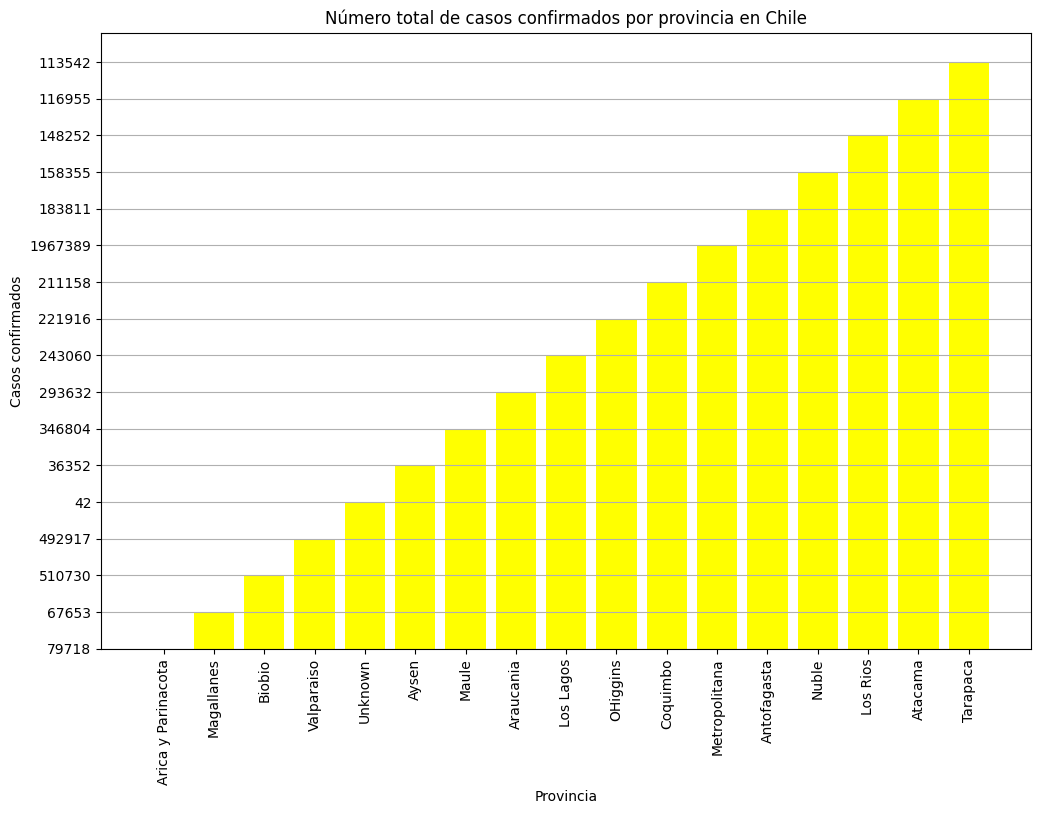

In [ ]:


# Suponiendo que 'data' contiene los datos de casos confirmados por país
url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]
# Crear un DataFrame con los datos
df = pd.DataFrame(data)



# Filtrar los datos para incluir solo las provincias chinas
df_chile = df[(df['Country_Region'] == 'Chile') & (df['Province_State'] != '')]

# Agrupar los datos por provincia y sumar los casos confirmados
df_chile_province = df_chile.groupby('Province_State')['Confirmed'].sum().reset_index()

# Ordenar las provincias por número de casos confirmados
df_chile_province = df_chile_province.sort_values(by='Confirmed', ascending=False)



# Graficar el número total de casos confirmados por provincia en Chile
plt.figure(figsize=(12, 8))
plt.bar(df_chile_province['Province_State'], df_chile_province['Confirmed'], color='yellow')
plt.title('Número total de casos confirmados por provincia en Chile')
plt.xlabel('Provincia')
plt.ylabel('Casos confirmados')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()




# Análisis de datos sobre este gráfico
Del gráfico generado por este código, podemos deducir lo siguiente:

1. **Distribución de casos confirmados por provincia en Chile**: El gráfico de barras muestra la cantidad total de casos confirmados de COVID-19 en cada provincia de Chile. Observamos que algunas provincias tienen más casos confirmados que otras, lo que sugiere una distribución desigual del virus en todo el país.

2. **Provincias con mayor y menor número de casos**: Podemos identificar las provincias con el mayor y menor número de casos confirmados al observar las barras más altas y más bajas en el gráfico, respectivamente. Esto puede ayudar a las autoridades de salud a dirigir recursos y esfuerzos de manera más efectiva.

3. **Variación en la incidencia del virus**: La disparidad en la altura de las barras indica una variación en la incidencia del virus entre diferentes provincias. Algunas provincias pueden estar experimentando brotes más graves, mientras que otras pueden tener una menor propagación del virus.

4. **Identificación de provincias críticas**: Las provincias con un número significativamente alto de casos confirmados pueden considerarse críticas en términos de atención médica, recursos y seguimiento de contactos. Estas provincias pueden necesitar medidas de control más estrictas para contener la propagación del virus.

5. **Comparación y seguimiento temporal**: Si se disponen de datos históricos, este gráfico también puede ayudar a comparar la evolución de la situación en cada provincia a lo largo del tiempo. Se pueden identificar tendencias, como el aumento o la disminución en el número de casos confirmados en diferentes provincias.

En resumen, el gráfico proporciona una visualización clara de la distribución de casos confirmados de COVID-19 por provincia en Chile, lo que puede ayudar en la toma de decisiones y en la asignación de recursos para combatir la pandemia.


<ipython-input-11-bd5ab4eed56d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['Deaths'] = pd.to_numeric(df_countries['Deaths'], errors='coerce')
<ipython-input-11-bd5ab4eed56d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['Confirmed'] = pd.to_numeric(df_countries['Confirmed'], errors='coerce')
<ipython-input-11-bd5ab4eed56d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

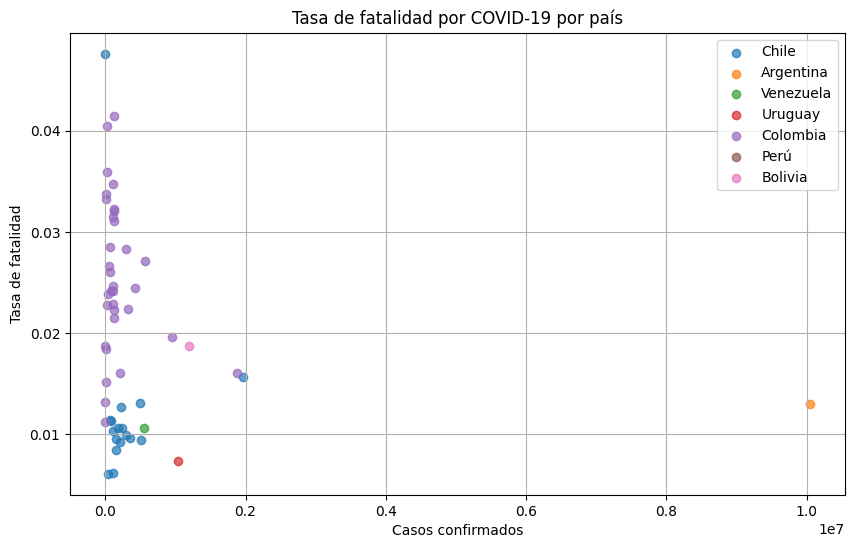

In [ ]:
# 'data' contiene los datos de casos confirmados y muertes por COVID-19 por país
url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]
# creamos un DataFrame con los datos
df = pd.DataFrame(data)

# Filtramos los datos para incluir solo los países especificados (Chile, Argentina, Venezuela, Uruguay, Colombia, Perú, Bolivia)
countries_of_interest = ['Chile', 'Argentina', 'Venezuela', 'Uruguay', 'Colombia', 'Perú', 'Bolivia']
df_countries = df[df['Country_Region'].isin(countries_of_interest)]

# Convertimos 'Deaths' y 'Confirmed' a valores numéricos, manejar errores si hay valores no numéricos
df_countries['Deaths'] = pd.to_numeric(df_countries['Deaths'], errors='coerce')
df_countries['Confirmed'] = pd.to_numeric(df_countries['Confirmed'], errors='coerce')

# Calculamos la tasa de fatalidad (muertes / casos confirmados) por país
df_countries['Case_Fatality_Ratio'] = df_countries['Deaths'] / df_countries['Confirmed']

# Eliminamos filas con valores NaN en la tasa de fatalidad
df_countries = df_countries.dropna(subset=['Case_Fatality_Ratio'])

# Graficamos el gráfico de dispersión de la tasa de fatalidad por país
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    data_country = df_countries[df_countries['Country_Region'] == country]
    plt.scatter(data_country['Confirmed'], data_country['Case_Fatality_Ratio'], alpha=0.7, label=country)

plt.title('Tasa de fatalidad por COVID-19 por país')
plt.xlabel('Casos confirmados')
plt.ylabel('Tasa de fatalidad')
plt.legend()
plt.grid(True)
plt.show()



Del gráfico de dispersión generado por este código, podemos deducir lo siguiente:

1. **Relación entre casos confirmados y tasa de fatalidad**: Observamos cómo varía la tasa de fatalidad de COVID-19 en relación con el número de casos confirmados en cada país. Esto nos proporciona información sobre la letalidad del virus en diferentes contextos.

2. **Diferencias en la tasa de fatalidad entre países**: Podemos comparar la dispersión de los puntos para cada país en el gráfico y notar las diferencias en las tasas de fatalidad entre ellos. Algunos países pueden tener tasas de fatalidad más altas o más bajas en comparación con otros, lo que puede deberse a una variedad de factores, como la capacidad del sistema de salud, las políticas de contención del virus y la calidad de la atención médica.

3. **Identificación de anomalías**: Podemos identificar países que se destacan por tener tasas de fatalidad atípicamente altas o bajas en relación con el número de casos confirmados. Estas anomalías podrían indicar áreas que requieren una atención especial o un análisis más detallado para comprender mejor las razones detrás de estas tasas.

4. **Efectos de las medidas de control**: Si tenemos datos históricos, el gráfico puede ayudar a observar cómo las medidas de control implementadas en diferentes países afectan la tasa de fatalidad. Por ejemplo, una disminución en la tasa de fatalidad después de la implementación de medidas de distanciamiento social podría indicar la efectividad de estas medidas en la prevención de muertes.

En resumen, el gráfico de dispersión proporciona una visualización útil para comparar la tasa de fatalidad de COVID-19 entre diferentes países y entender cómo esta tasa se relaciona con el número de casos confirmados en cada país. Esto puede ayudar en la evaluación del impacto del virus y en la planificación de medidas de prevención y control.

<ipython-input-14-08f2f5df37fd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['Deaths'] = pd.to_numeric(df_countries['Deaths'], errors='coerce')
<ipython-input-14-08f2f5df37fd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['Confirmed'] = pd.to_numeric(df_countries['Confirmed'], errors='coerce')
<ipython-input-14-08f2f5df37fd>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

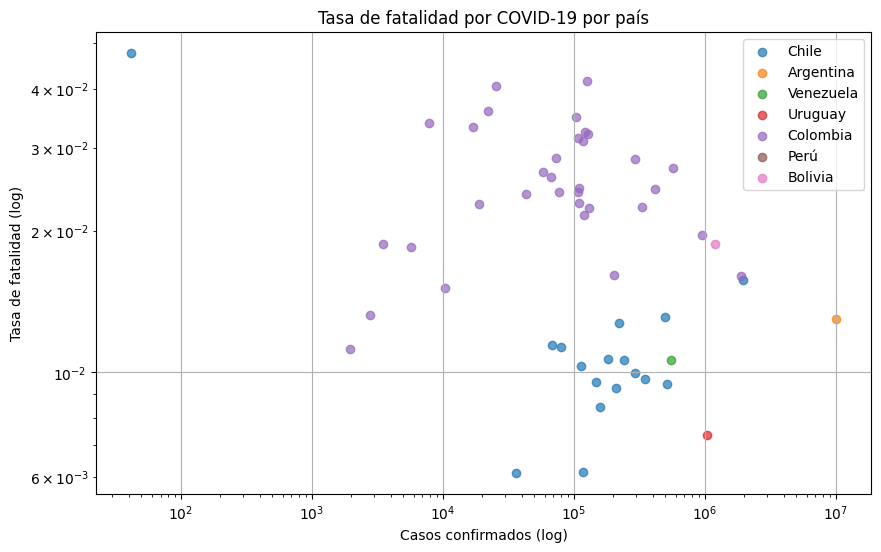

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Suponiendo que 'data' contiene los datos de casos confirmados y muertes por COVID-19 por país
url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]
# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Filtrar los datos para incluir solo los países especificados
countries_of_interest = ['Chile', 'Argentina', 'Venezuela', 'Uruguay', 'Colombia', 'Perú', 'Bolivia']
df_countries = df[df['Country_Region'].isin(countries_of_interest)]

# Convertir 'Deaths' y 'Confirmed' a numéricos, manejar errores si hay valores no numéricos
df_countries['Deaths'] = pd.to_numeric(df_countries['Deaths'], errors='coerce')
df_countries['Confirmed'] = pd.to_numeric(df_countries['Confirmed'], errors='coerce')

# Calcular la tasa de fatalidad (muertes / casos confirmados) por país
df_countries['Case_Fatality_Ratio'] = df_countries['Deaths'] / df_countries['Confirmed']

# Eliminar filas con valores NaN en la tasa de fatalidad
df_countries = df_countries.dropna(subset=['Case_Fatality_Ratio'])

# Graficar el gráfico de dispersión de la tasa de fatalidad por país
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    data_country = df_countries[df_countries['Country_Region'] == country]
    plt.scatter(data_country['Confirmed'], data_country['Case_Fatality_Ratio'], alpha=0.7, label=country)

plt.title('Tasa de fatalidad por COVID-19 por país')
plt.xlabel('Casos confirmados (log)')
plt.ylabel('Tasa de fatalidad (log)')
plt.legend()
plt.grid(True)

# Aplicar transformación logarítmica truncada a los ejes
plt.xscale('log')
plt.yscale('log')

plt.show()


# Análisis de datos modificados del código anterior
Este código genera un gráfico de dispersión que muestra la relación entre los casos confirmados y la tasa de fatalidad de COVID-19 para varios países seleccionados. Aquí está lo que podemos deducir de este código:

1. **Relación entre casos confirmados y tasa de fatalidad**: El gráfico de dispersión nos permite visualizar cómo varía la tasa de fatalidad en relación con el número de casos confirmados para cada país. Podemos ver si hay alguna tendencia o patrón general en esta relación.

2. **Diferencias entre países**: Al observar la dispersión de los puntos, podemos identificar diferencias en la tasa de fatalidad entre los países seleccionados. Algunos países pueden tener una tasa de fatalidad más alta o más baja en comparación con otros, lo que puede deberse a una variedad de factores como la capacidad del sistema de salud, las políticas de contención del virus y la calidad de la atención médica.

3. **Escala logarítmica**: La aplicación de una escala logarítmica a los ejes x e y (casos confirmados y tasa de fatalidad, respectivamente) permite una mejor visualización de los datos, especialmente cuando hay una amplia gama de valores. Esto puede ayudar a identificar relaciones no lineales y a distinguir mejor los puntos en áreas densamente pobladas del gráfico.

4. **Manejo de datos faltantes**: El código maneja valores faltantes en la tasa de fatalidad eliminando las filas correspondientes del DataFrame. Esto garantiza que solo se representen los países para los cuales se dispone de datos completos.

En resumen, este código proporciona una visualización útil de la relación entre los casos confirmados y la tasa de fatalidad de COVID-19 para varios países, lo que puede ayudar en la evaluación del impacto del virus y en la comparación de la respuesta a la pandemia entre diferentes regiones del mundo.

<ipython-input-15-9180b69108ac>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['Deaths'] = pd.to_numeric(df_countries['Deaths'], errors='coerce')
<ipython-input-15-9180b69108ac>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['Confirmed'] = pd.to_numeric(df_countries['Confirmed'], errors='coerce')
<ipython-input-15-9180b69108ac>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

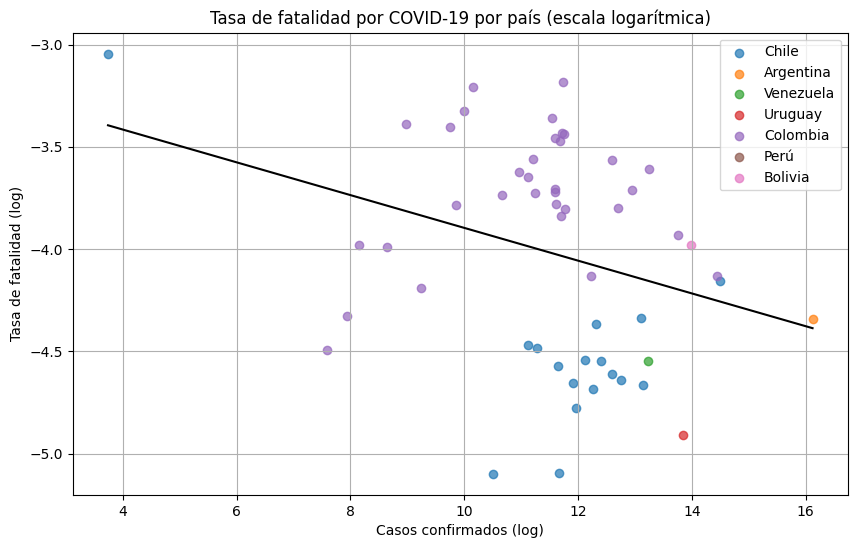

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress

# Suponiendo que 'data' contiene los datos de casos confirmados y muertes por COVID-19 por país
url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]
# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Filtrar los datos para incluir solo los países especificados
countries_of_interest = ['Chile', 'Argentina', 'Venezuela', 'Uruguay', 'Colombia', 'Perú', 'Bolivia']
df_countries = df[df['Country_Region'].isin(countries_of_interest)]

# Convertir 'Deaths' y 'Confirmed' a numéricos, manejar errores si hay valores no numéricos
df_countries['Deaths'] = pd.to_numeric(df_countries['Deaths'], errors='coerce')
df_countries['Confirmed'] = pd.to_numeric(df_countries['Confirmed'], errors='coerce')

# Calcular la tasa de fatalidad (muertes / casos confirmados) por país
df_countries['Case_Fatality_Ratio'] = df_countries['Deaths'] / df_countries['Confirmed']

# Eliminar filas con valores NaN en la tasa de fatalidad
df_countries = df_countries.dropna(subset=['Case_Fatality_Ratio'])

# Aplicar transformación logarítmica a los datos
df_countries['Confirmed_log'] = np.log(df_countries['Confirmed'])
df_countries['Case_Fatality_Ratio_log'] = np.log(df_countries['Case_Fatality_Ratio'])

# Realizar la regresión lineal en el espacio logarítmico
slope, intercept, _, _, _ = linregress(df_countries['Confirmed_log'], df_countries['Case_Fatality_Ratio_log'])

# Graficar el gráfico de dispersión y la línea de regresión
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    data_country = df_countries[df_countries['Country_Region'] == country]
    plt.scatter(data_country['Confirmed_log'], data_country['Case_Fatality_Ratio_log'], alpha=0.7, label=country)

x_values = np.linspace(df_countries['Confirmed_log'].min(), df_countries['Confirmed_log'].max(), 100)
plt.plot(x_values, slope * x_values + intercept, color='black')

plt.title('Tasa de fatalidad por COVID-19 por país (escala logarítmica)')
plt.xlabel('Casos confirmados (log)')
plt.ylabel('Tasa de fatalidad (log)')
plt.legend()
plt.grid(True)

plt.show()


# Análisis de datos y regresión lineal
Coeficiente de pendiente y de intercepción: Los coeficientes de pendiente e intercepción obtenidos de la regresión lineal nos proporcionan información sobre la dirección y la magnitud de la relación entre los casos confirmados y la tasa de fatalidad. Una pendiente positiva indica una asociación positiva entre las variables, mientras que una pendiente negativa indica una asociación negativa.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


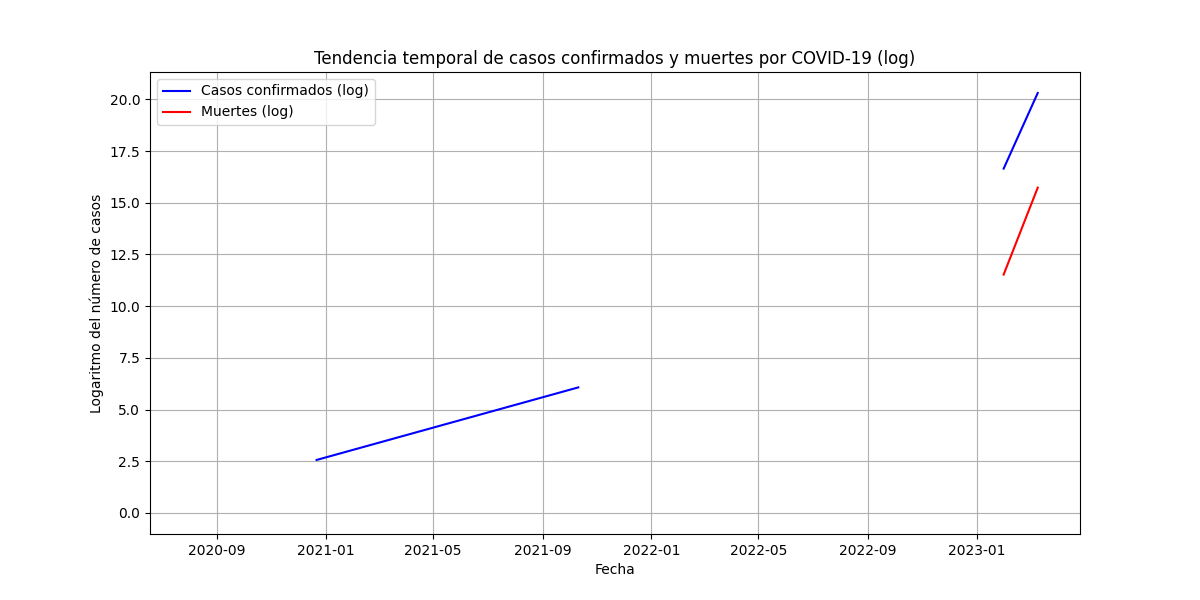

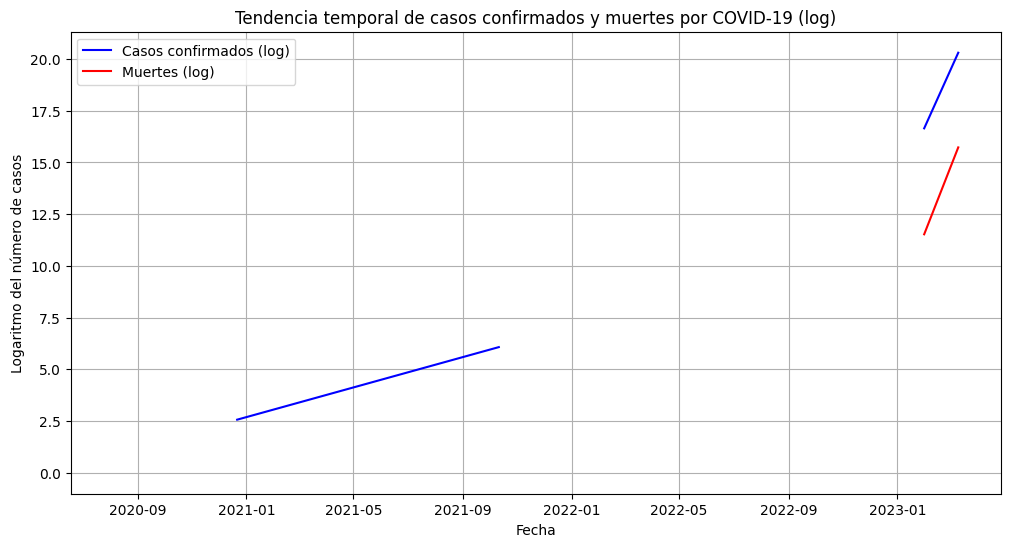

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from PIL import Image
import numpy as np

# Suponiendo que 'data' contiene los datos de casos confirmados y muertes por COVID-19
url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]
# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Convertir la columna de fecha a tipo datetime
df['Last_Update'] = pd.to_datetime(df['Last_Update'])

# Convertir los datos de casos confirmados y muertes a tipo numérico
df['Confirmed'] = pd.to_numeric(df['Confirmed'])
df['Deaths'] = pd.to_numeric(df['Deaths'])

# Agrupar los datos por fecha y sumar los casos confirmados y las muertes
df_daily = df.groupby('Last_Update').agg({'Confirmed': 'sum', 'Deaths': 'sum'}).reset_index()

# Aplicar transformación logarítmica a los datos de casos confirmados y muertes
df_daily['Confirmed_log'] = np.log(df_daily['Confirmed'])
df_daily['Deaths_log'] = np.log(df_daily['Deaths'])

# Graficar la tendencia temporal de casos confirmados y muertes
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Last_Update'], df_daily['Confirmed_log'], label='Casos confirmados (log)', color='blue')
plt.plot(df_daily['Last_Update'], df_daily['Deaths_log'], label='Muertes (log)', color='red')
plt.title('Tendencia temporal de casos confirmados y muertes por COVID-19 (log)')
plt.xlabel('Fecha')
plt.ylabel('Logaritmo del número de casos')
plt.legend()
plt.grid(True)

plt.savefig('figure.png')
Image.open('figure.png')



# Análisis de Datos sobre Casos de Fallecidos por Fecha
Este código genera un gráfico que muestra la tendencia temporal de casos confirmados y muertes por COVID-19 en una escala logarítmica. Aquí está lo que podemos deducir de este código:

1. **Tendencia temporal de casos confirmados y muertes**: El gráfico de líneas nos permite visualizar cómo evolucionan a lo largo del tiempo los casos confirmados y las muertes por COVID-19. Al representar los datos en una escala logarítmica, podemos identificar patrones y tendencias de una manera más clara, especialmente cuando hay una amplia gama de valores.

2. **Comparación de la magnitud de los cambios**: Al aplicar una transformación logarítmica a los datos de casos confirmados y muertes, podemos comparar la magnitud de los cambios en una escala más uniforme. Esto nos permite visualizar tanto pequeñas variaciones como grandes incrementos en una misma escala logarítmica.

3. **Diferencias en la tendencia**: Podemos observar si hay diferencias en la tendencia temporal entre los casos confirmados y las muertes. Por ejemplo, podríamos identificar períodos en los que el número de casos confirmados aumenta rápidamente mientras que el número de muertes se mantiene relativamente estable, o viceversa.

4. **Impacto de intervenciones y medidas de control**: Si tenemos datos históricos, el gráfico puede ayudar a evaluar el impacto de intervenciones y medidas de control en la evolución de la pandemia. Por ejemplo, podríamos observar cómo las restricciones de movilidad o la implementación de políticas de salud pública afectan la curva de casos confirmados y muertes a lo largo del tiempo.

Este código proporciona una visualización útil de la tendencia temporal de casos confirmados y muertes por COVID-19 en una escala logarítmica, lo que permite identificar patrones y tendencias de una manera más clara y uniforme.

In [ ]:
pip install plotly

In [ ]:
import plotly.graph_objects as go

# Retrieve data from the API
url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]

# Create a DataFrame with the data
df = pd.DataFrame(data)

# Filter data for American countries (replace with your desired countries)
american_countries = ['Chile', 'Argentina', 'Venezuela', 'Uruguay', 'Colombia', 'Perú', 'Bolivia']
df_american = df[df['Country_Region'].isin(american_countries)]

# Drop rows with missing values in 'Deaths' and 'Country_Region' columns
df_american = df_american.dropna(subset=['Deaths', 'Country_Region'])

# Remove duplicate rows based on 'Country_Region'
df_american = df_american.drop_duplicates(subset='Country_Region')

# Check if the DataFrame is empty after filtering
if df_american.empty:
    print("Error: DataFrame is empty after filtering.")
    exit(1)

# Calculate total deaths and confirmed cases for each country
deaths_by_country = df_american.groupby('Country_Region')['Deaths'].sum()
confirmed_by_country = df_american.groupby('Country_Region')['Confirmed'].sum()

# Create labels and values for the pie charts
labels = deaths_by_country.index.to_list()
values_deaths = deaths_by_country.values.tolist()
values_confirmed = confirmed_by_country.values.tolist()

# Create pie charts for each country
for i, country in enumerate(labels):
    fig = go.Figure(data=[go.Pie(labels=['Muertes', 'Casos Confirmados'], values=[values_deaths[i], values_confirmed[i]])])

    fig.update_layout(
        title_text=f'Comparación Muertes vs Casos Confirmados en {country}',
        legend_title='',
        font_family="Arial",
        font_size=12,
    )

    fig.show()

# Create a pie chart with total data for all American countries
fig_total = go.Figure(data=[go.Pie(labels=labels, values=values_deaths)])

fig_total.update_layout(
    title_text='Comparación total: Muertes en países americanos',
    legend_title='',
    font_family="Arial",
    font_size=12,
)

fig_total.show()


# Análisis de Datos:
Lo que podemos deducir de estos gráficos de pastel es la proporción de muertes con respecto al total de casos confirmados para cada país individualmente y para todos los países americanos en conjunto. También podemos comparar estas proporciones entre diferentes países. Esto puede ayudar a entender la gravedad de la situación en términos de la tasa de mortalidad en relación con el número total de casos confirmados.
Podemos notar que en Argentina se produjeron más decesos que en el resto de países de este análisis.

In [ ]:
!pip install plotly
import plotly.graph_objects as go
import pandas as pd
url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]

df = pd.DataFrame(data)

european_countries = ['Chile', 'Argentina', 'Venezuela', 'Uruguay', 'Colombia', 'Perú', 'Bolivia']
df_europe = df[df['Country_Region'].isin(european_countries)]

df_europe = df_europe.dropna(subset=['Deaths', 'Country_Region'])

df_europe = df_europe.drop_duplicates(subset='Country_Region')

if df_europe.empty:
    print("Error: DataFrame is empty after filtering.")
    exit(1)

deaths_by_country = df_europe.groupby('Country_Region')['Deaths'].sum()
confirmed_by_country = df_europe.groupby('Country_Region')['Confirmed'].sum()

labels = deaths_by_country.index.to_list()
values_deaths = deaths_by_country.values.tolist()
values_confirmed = confirmed_by_country.values.tolist()

for i, country in enumerate(labels):
    fig = go.Figure(data=[go.Pie(labels=['Muertes', 'Casos Confirmados'], values=[values_deaths[i], values_confirmed[i]])])

    fig.update_layout(
        title_text=f'Comparación Muertes vs Casos Confirmados en {country}',
        legend_title='',
        font_family="Arial",
        font_size=12,
    )



fig_total = go.Figure(data=[go.Pie(labels=labels, values=values_deaths)])


fig_total = go.Figure(data=[go.Pie(labels=labels, values=values_confirmed)])

fig_total.update_layout(
    title_text='Comparación total: Casos confirmados en países europeos',
    legend_title='',
    font_family="Arial",
    font_size=12,
)

fig_total.show()

# Gráfico de Torta para análisis de Contagios
El gráfico de pastel total que muestra los casos confirmados en países europeos nos brinda una visión general de la situación en la región en su conjunto, permitiéndonos comparar el total de casos confirmados entre países y tener una idea general de la magnitud del impacto del virus en la región.
omo podemos notar, Argentina nuevamente destaca como el país con más contagios en el mundo.